/tmp/ipykernel_2675/4065574514.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Model"], rotation=45, ha="right")
/tmp/ipykernel_2675/4065574514.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Model"], rotation=45, ha="right")


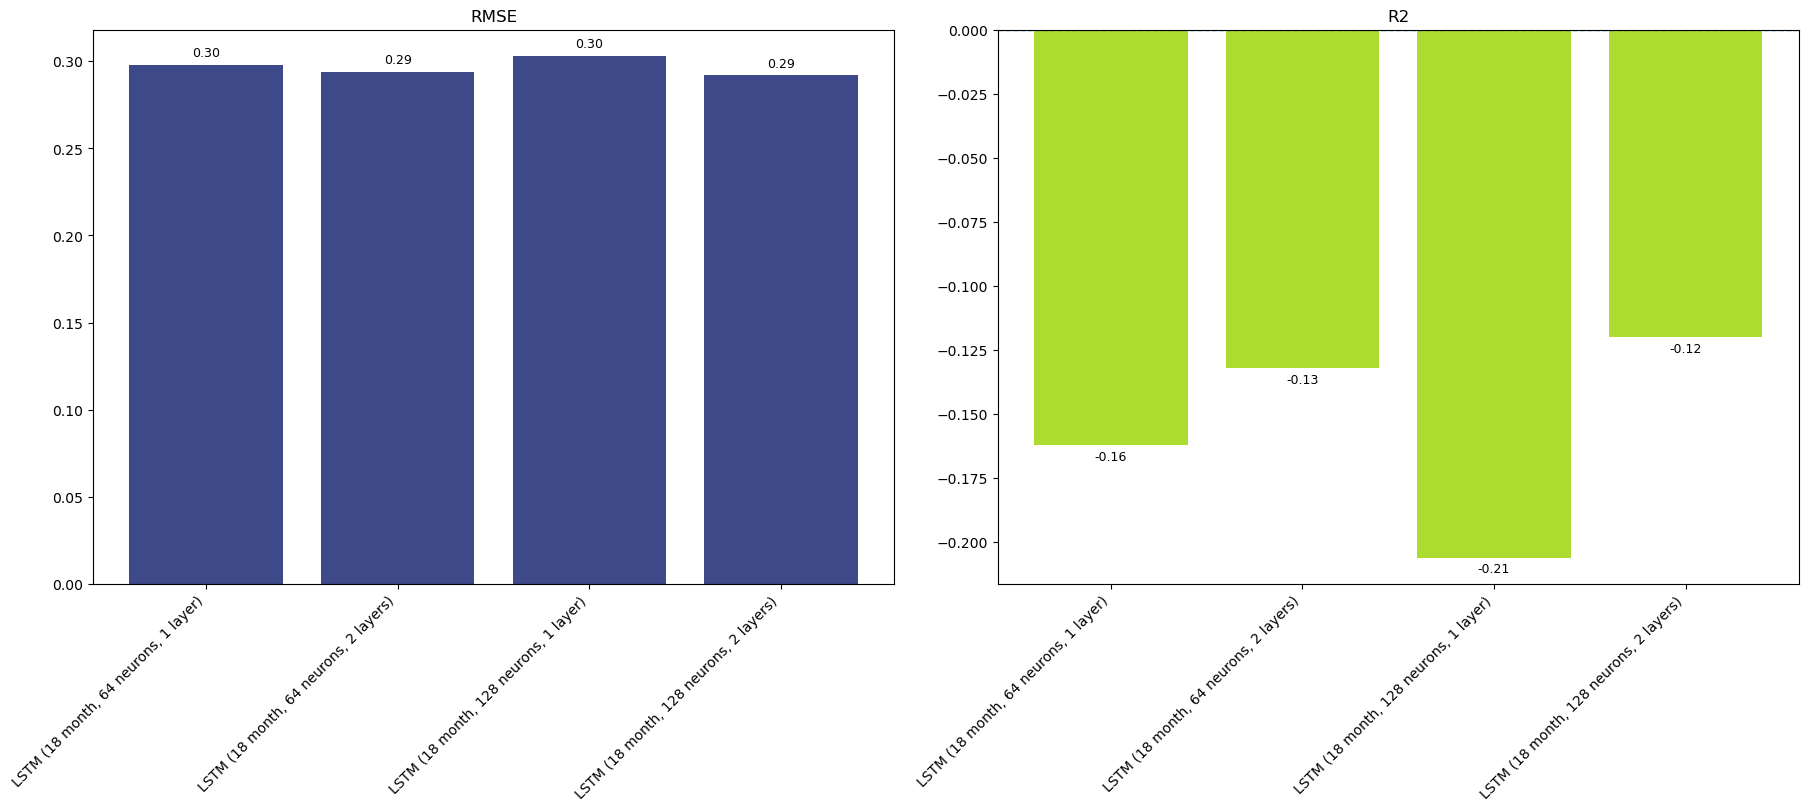

In [1]:
# =========================
# Imports
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Create results table
# =========================
data = [
    # ----- LSTM -----
    {"Model": "LSTM (1-month)",  "Type": "LSTM", "RMSE": 0.34932426, "MAE": 0.250583,   "R2": -0.005697727},
    {"Model": "LSTM (3-month)",  "Type": "LSTM", "RMSE": 0.36207247, "MAE": 0.25882703, "R2": -0.1546601},
    {"Model": "LSTM (6-month)",  "Type": "LSTM", "RMSE": 0.35434893, "MAE": 0.2554919,  "R2": -0.06364453},
    {"Model": "LSTM (9-month)",  "Type": "LSTM", "RMSE": 0.3796012,  "MAE": 0.28010428, "R2": -0.06758058},
    {"Model": "LSTM (12-month)", "Type": "LSTM", "RMSE": 0.36959106, "MAE": 0.27021688, "R2": -0.16496813},
    {"Model": "LSTM (15-month)", "Type": "LSTM", "RMSE": 0.30811784, "MAE": 0.21869886, "R2": -0.18126357},
    {"Model": "LSTM (18-month)", "Type": "LSTM", "RMSE": 0.29770124, "MAE": 0.20582406, "R2": -0.16175032},
    {"Model": "LSTM (21-month)", "Type": "LSTM", "RMSE": 0.3493363,  "MAE": 0.25251883, "R2": -0.15450633},

    # ----- Random Forest -----
    {"Model": "RF (Model 1)", "Type": "RF",
     "RMSE": 0.27732446115465265, "MAE": 0.19358386586253262, "R2": -0.008156428739396038},

    {"Model": "RF (Model 2)", "Type": "RF",
     "RMSE": 0.2829581725027785, "MAE": 0.1937537206872231, "R2": -0.0495328877513348},
]

data = [
    # ----- LSTM -----
    {"Model": "LSTM (18 month, 64 neurons, 1 layer)",  "Type": "LSTM", "RMSE": 0.298, "R2": -0.162},
    {"Model": "LSTM (18 month, 64 neurons, 2 layers)",  "Type": "LSTM", "RMSE": 0.294, "R2": -0.132},
    {"Model": "LSTM (18 month, 128 neurons, 1 layer)",  "Type": "LSTM", "RMSE": 0.303,  "R2": -0.206},
    {"Model": "LSTM (18 month, 128 neurons, 2 layers)",  "Type": "LSTM", "RMSE": 0.292,  "R2": -0.120},
]

df = pd.DataFrame(data)

# =========================
# Plotting
# =========================
metrics = ["RMSE", "R2"]
colors = {
    "RMSE": "#3e4989",
    "R2": "#addc30"
}

fig, axes = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=True)

for ax, metric in zip(axes, metrics):
    bars = ax.bar(df["Model"], df[metric], color=colors[metric])
    ax.set_title(metric)
    ax.set_xticklabels(df["Model"], rotation=45, ha="right")

    if metric == "R2":
        ax.axhline(0, linestyle="--", linewidth=1)

    # ---- Add value labels ----
    for bar, val in zip(bars, df[metric]):
        if metric == "R2" and val < 0:
            y = val - 0.002
            va = "top"
        else:
            y = val + 0.003
            va = "bottom"

        ax.text(
            bar.get_x() + bar.get_width() / 2,
            y,
            f"{val:.2f}",
            ha="center",
            va=va,
            fontsize=9
        )

plt.show()